1. Exploring Activation Functions in Neural Networks
- Objective:
 - To explore and compare different activation functions used in artificial neural networks and understand their impact on the output of a neural network.
- Scenario:
 - You are tasked with implementing and visualizing various activation functions to observe how they transform inputs and affect the output.
  - You will also train a simple neural network using these activation functions and evaluate their performance.
- Lab Tasks:
 - 1. Implement and Visualize Activation Functions:
   - Implement the following activation functions in Python:
    - Step Function
    - Sigmoid Function (Binary and Bipolar)
    - Tanh Function
    - ReLU Function
  - Visualize each activation function using matplotlib/seaborn/bokeh to
observe how they map input values to output values.

- 2. Implement a Simple Neural Network:
  - Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).
  - Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.
  - Compare the performance of the neural network with different activation
functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

 - 1. Implement and Visualize Activation Functions:
   - Implement the following activation functions in Python:
    - Step Function
    - Sigmoid Function (Binary and Bipolar)
    - Tanh Function
    - ReLU Function
  - Visualize each activation function using matplotlib/seaborn/bokeh to
observe how they map input values to output values.



In [ ]:
# Creating dummy dataset using linspace
x = np.linspace(-5, 5, 100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [ ]:
# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [ ]:
# Sigmoid Binary Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Sigmoid Bipolar Function
def sigmoid_bipolar(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

In [ ]:
# TanH Function
def tanh_function(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [ ]:
# RelU Function
def relu_function(x):
    return np.maximum(0, x)

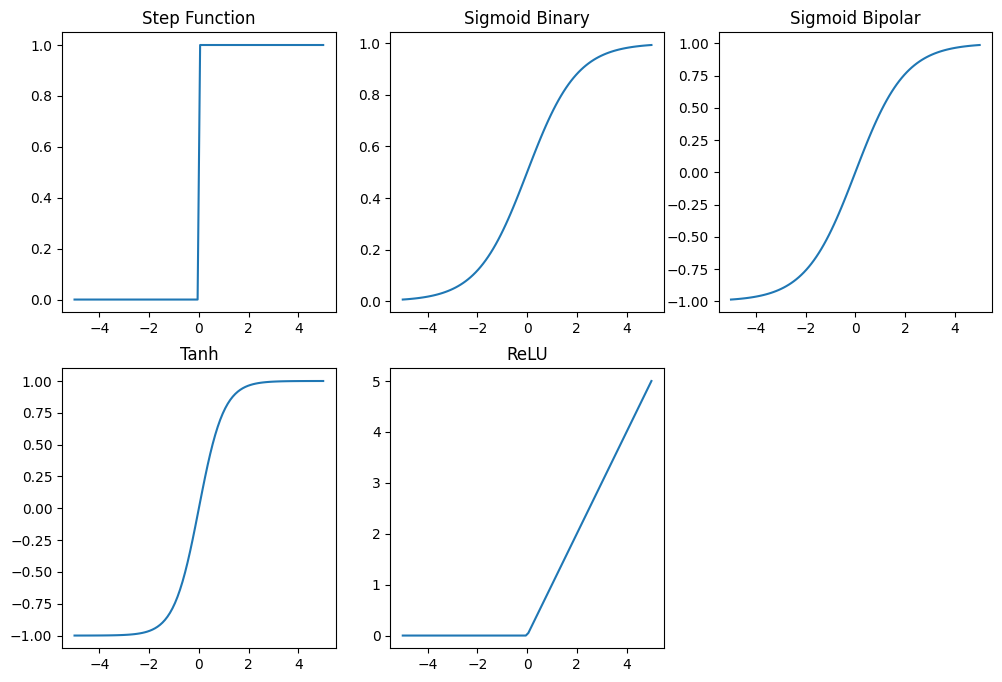

In [ ]:
# Visualize each activation function using matplotlib/seaborn/bokeh to observe how they map input values to output values.
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, step_function(x))
plt.title('Step Function')

plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Binary')

plt.subplot(2, 3, 3)
plt.plot(x, sigmoid_bipolar(x))
plt.title('Sigmoid Bipolar')

plt.subplot(2, 3, 4)
plt.plot(x, tanh_function(x))
plt.title('Tanh')

plt.subplot(2, 3, 5)
plt.plot(x, relu_function(x))
plt.title('ReLU')

plt.show()

- 2. Implement a Simple Neural Network:
  - Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).
  - Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.
  - Compare the performance of the neural network with different activation
functions.

Using Iris dataset from sklearn's datasets.

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

y_binary = (y == 0).astype(int)

Split the dataset into training and testing sets:

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize the features
X_train = X_train / X_train.max(axis=0)
X_test = X_test / X_test.max(axis=0)

Forward propagation function that can either operate with sigmoid, tanh or relu activation functions.

In [ ]:
def forward_propagation(X, W1, b1, W2, b2, activation_func):
    Z1 = np.dot(X, W1) + b1
    if activation_func == 'sigmoid':
        A1 = sigmoid(Z1)
    elif activation_func == 'tanh':
        A1 = tanh_function(Z1)
    else:
        A1 = relu_function(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Sigmoid for binary classification output
    return A2

Evaluating the activation function to obtain the accuracy by comparing the predictions with the actual output.

In [ ]:
def evaluate_activation_function(X, Y, activation_func, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(X.shape[1], hidden_size) * 0.1
    b1 = np.random.randn(1, hidden_size) * 0.1
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.random.randn(1, output_size) * 0.1

    A2 = forward_propagation(X, W1, b1, W2, b2, activation_func)  # Forward propagation only
    predictions = (A2 > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    accuracy = np.mean(predictions == Y.reshape(-1, 1)) * 100  # Compute accuracy
    return accuracy

Run the Evaluate activation function that takes the test inputs and expected output as well as size of hidden and output neurons.
We take size of hidden neurons as 5 and output neurons as 1 (binary).

In [ ]:
activation_functions = ['sigmoid', 'tanh', 'relu']
results = {func: evaluate_activation_function(X_test, y_test, func, 5, 1) for func in activation_functions}

Displaying the results for sigmoid, tanh and relu activation functions.

In [ ]:
print("Performance of Activation Functions:")
for func, accuracy in results.items():
    print(f"{func.capitalize()} Accuracy: {accuracy:.2f}%")

Performance of Activation Functions:
Sigmoid Accuracy: 66.67%
Tanh Accuracy: 66.67%
Relu Accuracy: 66.67%
